# Simple CNN for MNIST

## Imports:  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, TensorBoard

import tensorflow as tf
import os
import time
import pickle

sns.set(style='white', context='notebook', palette='deep')

working_dir="C:/Users/chenx/Desktop/1811_softdesign/20181125 - MNIST/"

Using TensorFlow backend.


## Data

In [2]:
train_csv_path = os.path.join(working_dir, "dataset","train.csv")
test_csv_path = os.path.join(working_dir, "dataset", "test.csv")

train = pd.read_csv(train_csv_path)
test = pd.read_csv(test_csv_path)

#### Separate training data into X,Y:  
X: Training Label  
Y: Image Data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

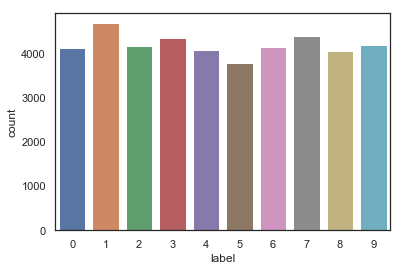

In [3]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

# Visualization:
g = sns.countplot(Y_train)
Y_train.value_counts()

#### Checking for nulls:

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#### Normalization:
  
From grayscale 0~255 to 0~1  
  

In [6]:
X_train = X_train / 255.0
test = test / 255.0

#### Reshaping:
From 1D 784 to 28x28x1

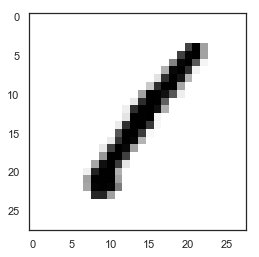

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

g = plt.imshow(X_train[0][:,:,0], cmap=plt.cm.binary)

#### Y_train label to hot vector

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Splitting test data

In [9]:
random_seed = 0

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,
                                                  test_size=0.1, # 10% used for validation
                                                  random_state=random_seed)

#### Saving processed data
    Using pickle to save processed data

In [10]:
pfile = open(os.path.join(working_dir, "pickle", "X_train.pickle"), "wb")
pickle.dump(X_train, pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "X_test.pickle"), "wb")
pickle.dump(X_test, pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_train.pickle"), "wb")
pickle.dump(Y_train, pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_test.pickle"), "wb")
pickle.dump(Y_test, pfile)
pfile.close()

In [2]:
pfile = open(os.path.join(working_dir, "pickle", "X_train.pickle"), "rb")
X_train = pickle.load(pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "X_test.pickle"), "rb")
X_test = pickle.load(pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_train.pickle"), "rb")
Y_train = pickle.load(pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_test.pickle"), "rb")
Y_test = pickle.load(pfile)
pfile.close()

## Models
+ Simple
+ Convoluted

### Super simple model
     Input Layer
     All connected, size 128
     All connected, size 128
     Output all connected, size 10

In [11]:
simple_model = Sequential()

simple_model.add(Flatten())
simple_model.add(Dense(128, activation="relu"))
simple_model.add(Dense(128, activation="relu"))
simple_model.add(Dense(10, activation="softmax"))

#### Training
    Using "adam" as optimizer: this is an ordinary optimizer for NNs
    "categorical_crossentropy" as loss function: this is also ordinary
    Epoch: 5, not a very complicated network

In [12]:
simple_model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
simple_model.fit(X_train, Y_train, 
                 epochs=30,
                validation_data = (X_test,Y_test))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 4s 100us/step - loss: 0.2776 - acc: 0.9169 - val_loss: 0.1487 - val_acc: 0.9555
Epoch 2/30
37800/37800 [==============================] - 3s 88us/step - loss: 0.1142 - acc: 0.9646 - val_loss: 0.1187 - val_acc: 0.9640
Epoch 3/30
37800/37800 [==============================] - 3s 88us/step - loss: 0.0775 - acc: 0.9761 - val_loss: 0.1133 - val_acc: 0.9676
Epoch 4/30
37800/37800 [==============================] - 3s 89us/step - loss: 0.0587 - acc: 0.9815 - val_loss: 0.1214 - val_acc: 0.9643
Epoch 5/30
37800/37800 [==============================] - 4s 94us/step - loss: 0.0444 - acc: 0.9859 - val_loss: 0.1832 - val_acc: 0.9545
Epoch 6/30
37800/37800 [==============================] - 3s 90us/step - loss: 0.0363 - acc: 0.9879 - val_loss: 0.1328 - val_acc: 0.9629
Epoch 7/30
37800/37800 [==============================] - 3s 91us/step - loss: 0.0294 - acc: 0.9900 - val_loss: 0.1124 - val_acc

#### Evaluation
     Loss and accuracy is slightly lower than in training:
     Not very overfitted

In [14]:
val_loss, val_acc = simple_model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

4200/4200 [==============================] - 0s 37us/step
0.1850168714397233 0.975


#### Looking at a random example

In [15]:
predictions = simple_model.predict([X_test])

6


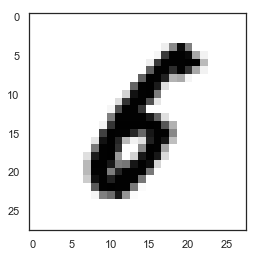

In [16]:
choice = np.random.randint(0,4201)

print(np.argmax(predictions[choice]))
g = plt.imshow(X_test[choice][:,:,0], cmap=plt.cm.binary)

#### Saving simple_model

In [17]:
simple_model_name = "mnist-simple-{}.model".format(int(time.time()))
simple_model.save(os.path.join(working_dir, "models", simple_model_name))

### CNN Model:
    Convlution size32 x2
    Down Sampling by 2x2
    Drop Out by 25% probablity
    
    Convlution size64 x2
    Down Sampling by 2x2
    Drop Out by 25% probablity
    
    Flatten layer
    All connected size256
    Drop Out by 50% probablity
    Output all connected size10

In [12]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32,
                    kernel_size = (5,5),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(Conv2D(filters = 32,
                    kernel_size = (5,5),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters = 64,
                    kernel_size = (3, 3),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(Conv2D(filters = 64,
                    kernel_size = (3, 3),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(MaxPool2D(pool_size=(2, 2),
                        strides=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax')) # Output Layer

#### Optimizer and loss function
* Optimizer:
      "Adam", because it is easier to type
* Loss Function:
      categorical_crossentropy as ordinary loss function

In [13]:
cnn_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
hasattr(cnn_model, 'train_function')

True

#### Learning rate reduction

In [3]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#### Data augmentation
    Randomly shift, zoom ,rotate; manipulate the images to minimize overfitting

In [4]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

#### Training

In [16]:
epochs = 16
batch_size = 128

In [17]:
#Setting up TensorBoard:
cnn_model_name = "mnist-cnn-e%i-b%i-%i" %(epochs, batch_size,int(time.time()))
logd = os.path.join(working_dir, "logs", cnn_model_name)
tensorboard = TensorBoard(log_dir=logd)

In [18]:
history = cnn_model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                                  epochs = epochs, 
                                  validation_data = (X_test,Y_test), 
                                  steps_per_epoch = X_train.shape[0] // batch_size, 
                                  callbacks = [learning_rate_reduction, tensorboard])

Epoch 1/16
295/295 [==============================] - 11s 39ms/step - loss: 0.4783 - acc: 0.8462 - val_loss: 0.0795 - val_acc: 0.9745
Epoch 2/16
295/295 [==============================] - 10s 34ms/step - loss: 0.1572 - acc: 0.9527 - val_loss: 0.0526 - val_acc: 0.9843
Epoch 3/16
295/295 [==============================] - 10s 34ms/step - loss: 0.1115 - acc: 0.9667 - val_loss: 0.0549 - val_acc: 0.9848 - ETA: 1s - loss: 0.1140 - acc: 0. - ETA: 1s - loss
Epoch 4/16
295/295 [==============================] - 10s 34ms/step - loss: 0.0911 - acc: 0.9725 - val_loss: 0.0394 - val_acc: 0.9881
Epoch 5/16
295/295 [==============================] - 10s 34ms/step - loss: 0.0817 - acc: 0.9750 - val_loss: 0.0266 - val_acc: 0.9921
Epoch 6/16
295/295 [==============================] - 10s 34ms/step - loss: 0.0707 - acc: 0.9789 - val_loss: 0.0240 - val_acc: 0.9929s: 0.0 - ETA: 2s - loss: 0.0707 - acc: 0.9 - ETA: 2s - loss: 0.0704 - ETA: 1s - loss
Epoch 7/16
295/295 [==============================] - 11s 37

In [18]:
val_loss, val_acc = cnn_model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

4200/4200 [==============================] - 0s 104us/step
0.017648950389268413 0.995


In [19]:
cnn_model.save(os.path.join(working_dir, "models", cnn_model_name)+".model")

#Pickle-dumping training history
pfile = open(os.path.join(working_dir, "models", cnn_model_name)+".history", "wb")
pickle.dump(history, pfile)
pfile.close()

#### Optimizing model:
    conv -> pool -> (for n conv layers) -> dropout -> flatten -> dense(size n) -> (for n dense layers) -> dropout -> output

In [5]:
epochs = 50
batch_size = 64

#Defining optimizing paramaters
dense_sizes=[128, 256, 384]
dense_layers=[0, 1, 2]
conv_layers=[2, 3, 4, 5]

for dense_layer in dense_layers:
    for dense_size in dense_sizes:
        for conv_layer in conv_layers:
            
            opt_model_name="opt-dense{}-dsize{}-conv{}-{}".format(dense_layer, dense_size, conv_layer, int(time.time()))
            logd = os.path.join(working_dir, "logs", opt_model_name)
            tensorboard = TensorBoard(log_dir=logd)
            
            opt_cnn_model = Sequential()
            # Input layer
            opt_cnn_model.add(Conv2D(filters = 32,
                            kernel_size = (5,5),
                            padding = 'Same',
                            activation = 'relu',
                            input_shape = (28,28,1)))
            
            for i in range(conv_layer - 1):
                opt_cnn_model.add(Conv2D(filters = 64,
                                        kernel_size = (3,3),
                                        padding = 'Same',
                                        activation = 'relu'))

                opt_cnn_model.add(MaxPool2D(pool_size=(2, 2)))
            
                                  
            opt_cnn_model.add(Dropout(0.25))
            opt_cnn_model.add(Flatten())
            
            for i in range(dense_layer):
                opt_cnn_model.add(Dense(dense_size, activation='relu'))
            
            opt_cnn_model.add(Dropout(0.5))
            opt_cnn_model.add(Dense(10, activation='softmax')) # Output Layer
            
            
            # Compiling model
            opt_cnn_model.compile(optimizer='adam',
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])
            
            # Training model
            history = opt_cnn_model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                                                  epochs = epochs, 
                                                  validation_data = (X_test,Y_test), 
                                                  steps_per_epoch = X_train.shape[0] // batch_size, 
                                                  callbacks = [learning_rate_reduction, tensorboard])
            
            # Saving model:
            opt_cnn_model.save(os.path.join(working_dir, "opt-models", opt_model_name)+".model")

            # Pickle-dumping training history
            pfile = open(os.path.join(working_dir, "opt-models", opt_model_name)+".history", "wb")
            pickle.dump(history, pfile)
            pfile.close()
            

Epoch 1/50
590/590 [==============================] - 10s 16ms/step - loss: 0.4625 - acc: 0.8540 - val_loss: 0.0922 - val_acc: 0.9726
Epoch 2/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1973 - acc: 0.9419 - val_loss: 0.0730 - val_acc: 0.9783
Epoch 3/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1556 - acc: 0.9514 - val_loss: 0.0610 - val_acc: 0.9817
Epoch 4/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1313 - acc: 0.9595 - val_loss: 0.0463 - val_acc: 0.9862
Epoch 5/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1225 - acc: 0.9626 - val_loss: 0.0419 - val_acc: 0.9857
Epoch 6/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1063 - acc: 0.9678 - val_loss: 0.0396 - val_acc: 0.9874
Epoch 7/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1014 - acc: 0.9697 - val_loss: 0.0392 - val_acc: 0.9881
Epoch 8/50
590/590 [==============================] - 8s 13ms/step -

590/590 [==============================] - 8s 14ms/step - loss: 0.0464 - acc: 0.9860 - val_loss: 0.0190 - val_acc: 0.9931
Epoch 15/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0419 - acc: 0.9874 - val_loss: 0.0205 - val_acc: 0.9933
Epoch 16/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0418 - acc: 0.9875 - val_loss: 0.0188 - val_acc: 0.9948
Epoch 17/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0412 - acc: 0.9876 - val_loss: 0.0219 - val_acc: 0.9929
Epoch 18/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0397 - acc: 0.9884 - val_loss: 0.0202 - val_acc: 0.9933
Epoch 19/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0365 - acc: 0.9896 - val_loss: 0.0208 - val_acc: 0.9936

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 20/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0169 - val_acc: 

590/590 [==============================] - 8s 13ms/step - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0222 - val_acc: 0.9924

Epoch 00026: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 27/50
590/590 [==============================] - 8s 13ms/step - loss: 0.0487 - acc: 0.9846 - val_loss: 0.0214 - val_acc: 0.9931
Epoch 28/50
590/590 [==============================] - 8s 13ms/step - loss: 0.0495 - acc: 0.9847 - val_loss: 0.0219 - val_acc: 0.9933
Epoch 29/50
590/590 [==============================] - 8s 13ms/step - loss: 0.0474 - acc: 0.9858 - val_loss: 0.0218 - val_acc: 0.9936
Epoch 30/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0480 - acc: 0.9851 - val_loss: 0.0215 - val_acc: 0.9936
Epoch 31/50
590/590 [==============================] - 8s 13ms/step - loss: 0.0482 - acc: 0.9852 - val_loss: 0.0226 - val_acc: 0.9936
Epoch 32/50
590/590 [==============================] - 8s 13ms/step - loss: 0.0462 - acc: 0.9852 - val_loss: 0.0230 - val_acc: 0

590/590 [==============================] - 8s 14ms/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0191 - val_acc: 0.9940
Epoch 38/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0266 - acc: 0.9923 - val_loss: 0.0195 - val_acc: 0.9943
Epoch 39/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0194 - val_acc: 0.9943
Epoch 40/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0258 - acc: 0.9916 - val_loss: 0.0191 - val_acc: 0.9943
Epoch 41/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0239 - acc: 0.9926 - val_loss: 0.0189 - val_acc: 0.9943
Epoch 42/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0265 - acc: 0.9922 - val_loss: 0.0192 - val_acc: 0.9945
Epoch 43/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0255 - acc: 0.9923 - val_loss: 0.0195 - val_acc: 0.9940
Epoch 44/50
590/590 [==============================] - 8s 14ms/step - loss

590/590 [==============================] - 9s 15ms/step - loss: 0.4694 - acc: 0.8469 - val_loss: 0.0714 - val_acc: 0.9798
Epoch 2/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1719 - acc: 0.9460 - val_loss: 0.0549 - val_acc: 0.9824
Epoch 3/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1342 - acc: 0.9585 - val_loss: 0.0452 - val_acc: 0.9864
Epoch 4/50
590/590 [==============================] - 8s 14ms/step - loss: 0.1055 - acc: 0.9678 - val_loss: 0.0429 - val_acc: 0.9862
Epoch 5/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0969 - acc: 0.9706 - val_loss: 0.0414 - val_acc: 0.9876
Epoch 6/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0899 - acc: 0.9730 - val_loss: 0.0438 - val_acc: 0.9874
Epoch 7/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0814 - acc: 0.9742 - val_loss: 0.0335 - val_acc: 0.9893
Epoch 8/50
590/590 [==============================] - 8s 14ms/step - loss: 0.076

590/590 [==============================] - 8s 14ms/step - loss: 0.0583 - acc: 0.9843 - val_loss: 0.0238 - val_acc: 0.9931
Epoch 15/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0547 - acc: 0.9850 - val_loss: 0.0303 - val_acc: 0.9917
Epoch 16/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0529 - acc: 0.9852 - val_loss: 0.0242 - val_acc: 0.9936

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 17/50
590/590 [==============================] - 9s 14ms/step - loss: 0.0470 - acc: 0.9874 - val_loss: 0.0249 - val_acc: 0.9938
Epoch 18/50
590/590 [==============================] - 9s 14ms/step - loss: 0.0440 - acc: 0.9876 - val_loss: 0.0253 - val_acc: 0.9938
Epoch 19/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0423 - acc: 0.9881 - val_loss: 0.0227 - val_acc: 0.9940

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 20/50
590/590 [=========================


Epoch 00026: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 27/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0243 - acc: 0.9932 - val_loss: 0.0161 - val_acc: 0.9952
Epoch 28/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0226 - acc: 0.9929 - val_loss: 0.0168 - val_acc: 0.9950
Epoch 29/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0252 - acc: 0.9928 - val_loss: 0.0162 - val_acc: 0.9955

Epoch 00029: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 30/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0251 - acc: 0.9924 - val_loss: 0.0168 - val_acc: 0.9950
Epoch 31/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0246 - acc: 0.9926 - val_loss: 0.0164 - val_acc: 0.9955
Epoch 32/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0237 - acc: 0.9932 - val_loss: 0.0157 - val_acc: 0.9957

Epoch 00032: ReduceLROnPlateau red

590/590 [==============================] - 9s 15ms/step - loss: 0.0159 - acc: 0.9957 - val_loss: 0.0187 - val_acc: 0.9952
Epoch 39/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0133 - acc: 0.9964 - val_loss: 0.0187 - val_acc: 0.9952
Epoch 40/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0143 - acc: 0.9957 - val_loss: 0.0187 - val_acc: 0.9952
Epoch 41/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0151 - acc: 0.9963 - val_loss: 0.0191 - val_acc: 0.9952
Epoch 42/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0130 - acc: 0.9964 - val_loss: 0.0189 - val_acc: 0.9952
Epoch 43/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0149 - acc: 0.9961 - val_loss: 0.0192 - val_acc: 0.9952
Epoch 44/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0131 - acc: 0.9962 - val_loss: 0.0193 - val_acc: 0.9957
Epoch 45/50
590/590 [==============================] - 9s 15ms/step - loss

590/590 [==============================] - 9s 15ms/step - loss: 0.1188 - acc: 0.9639 - val_loss: 0.0463 - val_acc: 0.9864
Epoch 3/50
590/590 [==============================] - 8s 14ms/step - loss: 0.0931 - acc: 0.9719 - val_loss: 0.0352 - val_acc: 0.9893
Epoch 4/50
590/590 [==============================] - 9s 14ms/step - loss: 0.0780 - acc: 0.9767 - val_loss: 0.0274 - val_acc: 0.9898
Epoch 5/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0722 - acc: 0.9786 - val_loss: 0.0230 - val_acc: 0.9929
Epoch 6/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0600 - acc: 0.9826 - val_loss: 0.0219 - val_acc: 0.9938
Epoch 7/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0571 - acc: 0.9818 - val_loss: 0.0208 - val_acc: 0.9929
Epoch 8/50
590/590 [==============================] - 9s 14ms/step - loss: 0.0512 - acc: 0.9844 - val_loss: 0.0237 - val_acc: 0.9926
Epoch 9/50
590/590 [==============================] - 9s 15ms/step - loss: 0.050

590/590 [==============================] - 9s 15ms/step - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0212 - val_acc: 0.9936 - loss: 0.0378 - acc: 
Epoch 16/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0367 - acc: 0.9887 - val_loss: 0.0201 - val_acc: 0.9945
Epoch 17/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0359 - acc: 0.9888 - val_loss: 0.0209 - val_acc: 0.9943

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 18/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0307 - acc: 0.9904 - val_loss: 0.0197 - val_acc: 0.9950
Epoch 19/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0289 - acc: 0.9912 - val_loss: 0.0178 - val_acc: 0.9952
Epoch 20/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0183 - val_acc: 0.9948

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 21/50
590/590 [==

590/590 [==============================] - 9s 15ms/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0177 - val_acc: 0.9952
Epoch 27/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0143 - acc: 0.9956 - val_loss: 0.0186 - val_acc: 0.9948

Epoch 00027: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 28/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0184 - val_acc: 0.9955
Epoch 29/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0123 - acc: 0.9964 - val_loss: 0.0182 - val_acc: 0.9950
Epoch 30/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0185 - val_acc: 0.9952

Epoch 00030: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 31/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0116 - acc: 0.9963 - val_loss: 0.0184 - val_acc: 0.9948
Epoch 32/50
590/590 [========================

590/590 [==============================] - 9s 15ms/step - loss: 0.0160 - acc: 0.9953 - val_loss: 0.0181 - val_acc: 0.9943
Epoch 39/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0152 - acc: 0.9956 - val_loss: 0.0185 - val_acc: 0.9943
Epoch 40/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0160 - acc: 0.9955 - val_loss: 0.0186 - val_acc: 0.9943
Epoch 41/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0168 - acc: 0.9949 - val_loss: 0.0181 - val_acc: 0.9945
Epoch 42/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0159 - acc: 0.9952 - val_loss: 0.0181 - val_acc: 0.9945
Epoch 43/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0186 - val_acc: 0.9948
Epoch 44/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0156 - acc: 0.9953 - val_loss: 0.0188 - val_acc: 0.9945
Epoch 45/50
590/590 [==============================] - 9s 15ms/step - loss

590/590 [==============================] - 9s 16ms/step - loss: 0.1544 - acc: 0.9586 - val_loss: 0.0596 - val_acc: 0.9824
Epoch 3/50
590/590 [==============================] - 9s 15ms/step - loss: 0.1090 - acc: 0.9697 - val_loss: 0.0500 - val_acc: 0.9867
Epoch 4/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0914 - acc: 0.9753 - val_loss: 0.0367 - val_acc: 0.9898.0915 - acc: 0.97
Epoch 5/50
590/590 [==============================] - 9s 16ms/step - loss: 0.0777 - acc: 0.9793 - val_loss: 0.0473 - val_acc: 0.9883
Epoch 6/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0691 - acc: 0.9814 - val_loss: 0.0303 - val_acc: 0.9905
Epoch 7/50
590/590 [==============================] - 9s 16ms/step - loss: 0.0609 - acc: 0.9838 - val_loss: 0.0311 - val_acc: 0.9917
Epoch 8/50
590/590 [==============================] - 9s 16ms/step - loss: 0.0625 - acc: 0.9832 - val_loss: 0.0417 - val_acc: 0.9905
Epoch 9/50
590/590 [==============================] - 9s 16ms/s

Epoch 14/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0215 - acc: 0.9934 - val_loss: 0.0204 - val_acc: 0.9943
Epoch 15/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0216 - val_acc: 0.9938

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 16/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0178 - acc: 0.9949 - val_loss: 0.0194 - val_acc: 0.9948
Epoch 17/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0164 - acc: 0.9950 - val_loss: 0.0204 - val_acc: 0.9938
Epoch 18/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0164 - acc: 0.9951 - val_loss: 0.0204 - val_acc: 0.9950

Epoch 00018: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 19/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.0200 - val_acc: 0.9945
Epoch 20/50
590/590 [==============

Epoch 22/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0225 - acc: 0.9933 - val_loss: 0.0253 - val_acc: 0.9926

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 23/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0144 - acc: 0.9959 - val_loss: 0.0204 - val_acc: 0.9955
Epoch 24/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0163 - acc: 0.9950 - val_loss: 0.0187 - val_acc: 0.9950
Epoch 25/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0142 - acc: 0.9955 - val_loss: 0.0247 - val_acc: 0.9938
Epoch 26/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0218 - val_acc: 0.9948

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 27/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0233 - val_acc: 0.9948
Epoch 28/50
590/590 [=============

590/590 [==============================] - 10s 16ms/step - loss: 0.0109 - acc: 0.9967 - val_loss: 0.0173 - val_acc: 0.9945

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 30/50
590/590 [==============================] - 10s 16ms/step - loss: 0.0122 - acc: 0.9964 - val_loss: 0.0164 - val_acc: 0.9945
Epoch 31/50
590/590 [==============================] - 10s 16ms/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0166 - val_acc: 0.9945
Epoch 32/50
590/590 [==============================] - 10s 16ms/step - loss: 0.0109 - acc: 0.9968 - val_loss: 0.0166 - val_acc: 0.9945

Epoch 00032: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 33/50
590/590 [==============================] - 10s 16ms/step - loss: 0.0106 - acc: 0.9967 - val_loss: 0.0171 - val_acc: 0.9943
Epoch 34/50
590/590 [==============================] - 10s 16ms/step - loss: 0.0119 - acc: 0.9965 - val_loss: 0.0169 - val_acc: 0.9948
Epoch 35/50
590/590 [==============================] - 

590/590 [==============================] - 9s 15ms/step - loss: 0.0103 - acc: 0.9971 - val_loss: 0.0171 - val_acc: 0.9952
Epoch 40/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0105 - acc: 0.9968 - val_loss: 0.0171 - val_acc: 0.9952
Epoch 41/50
590/590 [==============================] - 9s 16ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0171 - val_acc: 0.9955
Epoch 42/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0109 - acc: 0.9968 - val_loss: 0.0169 - val_acc: 0.9952
Epoch 43/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0116 - acc: 0.9969 - val_loss: 0.0171 - val_acc: 0.9952
Epoch 44/50
590/590 [==============================] - 9s 16ms/step - loss: 0.0104 - acc: 0.9970 - val_loss: 0.0172 - val_acc: 0.9952
Epoch 45/50
590/590 [==============================] - 9s 15ms/step - loss: 0.0116 - acc: 0.9964 - val_loss: 0.0173 - val_acc: 0.9950
Epoch 46/50
590/590 [==============================] - 9s 15ms/step - loss

* **Optimization results:**
    + Model with lowest val_loss at epoch 50: 2 dense, dense size 256, 5 conv
    + Model with highest val_acc at epoch 50: 1 dense, dense size 256, 2 conv, val_acc: 0.9962
    + Model with lowest val_loss: 1 dense, size 128, 3 conv, @epoch 23
    + Model with highest val_acc: 1 dense, size 256, 2 conv, @epoch 24, val_acc: 0.9967
    + ***The example network is near optimal***
    
    
**Learning rate reduction + dropout really minimizes overfitting, especially with a bigger all-connected network**  

### Model Evaluation

In [3]:
# Loading pre-trained model and history
load_model_name = "mnist-cnn-e16-b128-1543161649"
cnn_model = load_model(os.path.join(working_dir, "models", load_model_name)+".model")

#Pickle-loading training history
pfile = open(os.path.join(working_dir, "models", load_model_name)+".history", "rb")
history = pickle.load(pfile)
pfile.close()